In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv


In [3]:
df_train = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')
df_train.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df_train.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [5]:
df_train_set = df_train.dropna()
df_train_set = df_train_set.reset_index()
df_train_set = df_train_set.drop(columns=['index'],axis=1)
df_train_set

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
1,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,120000-150000,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
2,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",Businessfriend.com,100000-120000,"WDM Group is an innovative, forward thinking d...",#URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...,"Job Requirements:A reputation as a ""go-getter""...",Businessfriend will offer a competitive six fi...,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
3,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
4,103,Marketing Administrator,"GB, WAR, Coventry",Marketplace,15000-18000,Renewable Energy and Environmental Protection ...,The job is to support the growth of the #URL_9...,"Computer literateAble to work with HTML, altho...",For a suitably motivated and success orientate...,1,1,0,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,17735,Customer Service Representative,"US, TX, Houston",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
770,17760,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
771,17814,Customer Service Representative,"US, PA, Philadelphia",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
772,17850,Communication Designer,"US, CA, San Francisco",Design,80000-100000,Balanced Labs exists to provide accountants an...,Balanced Labs exists to improve the lives of a...,"Specifically, we’re looking for:5+ years of vi...","We offer great salaries, share options, and a ...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0


## Exploratory data analysis

Relation between Fradulent and telecommuting

,telecommuting,fraudulent
telecommuting,1.000000,0.094499
fraudulent,0.094499,1.000000


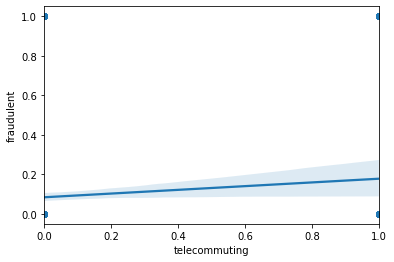

In [6]:
import seaborn as sns
df = df_train_set[['telecommuting','fraudulent']]
sns.regplot(x='telecommuting',y='fraudulent',data=df)
df.corr()

Relation between fraudulent and has_company_logo columns

,has_company_logo,fraudulent
has_company_logo,1.0000,-0.0734
fraudulent,-0.0734,1.0000


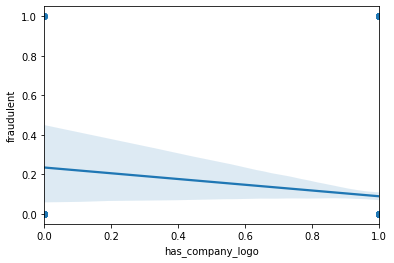

In [7]:
df = df_train_set[['has_company_logo','fraudulent']]
sns.regplot(x='has_company_logo',y='fraudulent',data=df)
df.corr()

Relation between fraudulent and has_questions

,has_questions,fraudulent
has_questions,1.000000,0.005072
fraudulent,0.005072,1.000000


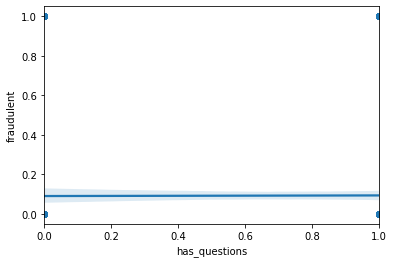

In [8]:
df = df_train_set[['has_questions','fraudulent']]
sns.regplot(x='has_questions',y='fraudulent',data=df)
df.corr()

Relation between job_id and Fraudulent

,job_id,fraudulent
job_id,1.000000,-0.089942
fraudulent,-0.089942,1.000000


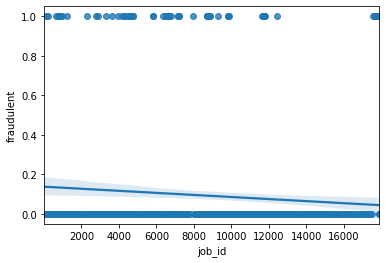

In [9]:
df = df_train_set[['job_id','fraudulent']]
sns.regplot(x='job_id',y='fraudulent',data=df)
df.corr()

Perform label encoding to convert the categorical variables into numerical

In [10]:
col = ['title','department','company_profile','description','requirements','benefits','required_experience','required_education','industry','function','employment_type']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df_train_set[col].apply(lambda x : le.fit_transform(x))
df2['fraudulent'] = df_train_set['fraudulent']
df2

,title,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,employment_type,fraudulent
0,255,12,67,677,613,510,5,4,50,20,1,0
1,596,193,89,24,316,94,3,1,24,31,1,0
2,599,37,165,2,304,119,3,7,38,31,1,0
3,269,155,196,250,414,82,5,3,49,23,1,1
4,346,147,125,532,183,232,2,1,38,22,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
769,138,66,71,568,288,446,2,3,55,7,1,1
770,138,66,71,568,288,446,2,3,55,7,1,1
771,138,66,71,568,288,446,2,3,55,7,1,1
772,100,80,29,113,479,428,5,1,12,9,1,0


## Model Development

In [22]:
from sklearn.model_selection import train_test_split
x = df2[['description','requirements','benefits','industry','function','employment_type']]
y = df2['fraudulent']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=4)


In [23]:
print(x_train.shape,x_test.shape)

(464, 6) (310, 6)


In [24]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)
d

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Model Evaluation

In [25]:
yhat = d.predict(x_test)
yhat

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       283
           1       0.63      0.63      0.63        27

    accuracy                           0.94       310
   macro avg       0.80      0.80      0.80       310
weighted avg       0.94      0.94      0.94       310



Based on the accuracy score, the model seems to be efficient in determining the fake/real jobs. 

## Data visualization

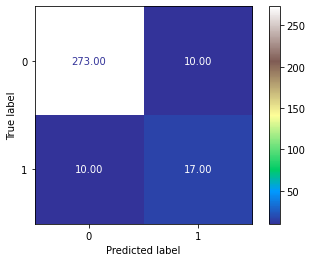

In [40]:
from sklearn.metrics import plot_confusion_matrix
display = plot_confusion_matrix(d,x_test,y_test,cmap = 'terrain',values_format = '0.2f')

Based on the confusion matrix, we could see that number of true positives are more indicating that the prediction level for a job that is fake has been inferred from most of the test samples.